## Import requied libraries

In [14]:
import streamlit as st
from pickle import dump, load
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from pickle import load,dump
import pandas as pd

### Import the Data

In [15]:
df = pd.read_csv("streamlit_exam_dataset.csv")



In [6]:
df.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


In [8]:
df.shape

(1278, 3)

In [9]:
df['output'].value_counts()

1    770
0    508
Name: output, dtype: int64

In [11]:
max(df['col1']),min(df['col1'])

(134.4996135, -134.4124633)

### Visualisations

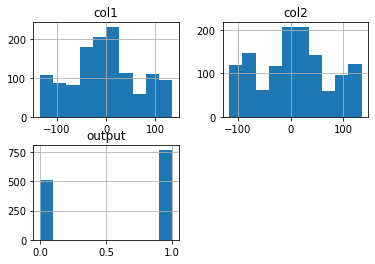

In [13]:
_=df.hist()

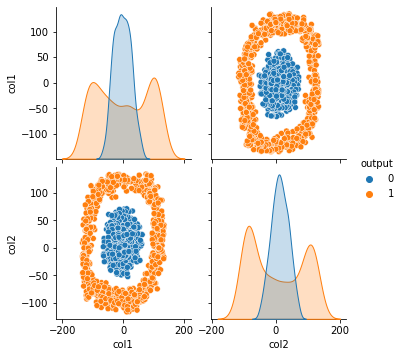

In [57]:
sns.pairplot(df,hue='output')

##### For this type of  data distribution svm with rbf kernel is best model 

#### Split the data as train and test

In [18]:
X_train,x_test,Y_train,y_test=train_test_split(df[['col1','col2']],df['output'])

In [22]:
X_train.shape,x_test.shape,Y_train.shape,y_test.shape

((958, 2), (320, 2), (958,), (320,))

### Apply logistic Model

In [23]:
l_r=LogisticRegression()
linear_model=l_r.fit(X_train,Y_train)


### Apply svm  model with linear kernnel

In [ ]:
svc_m1=SVC(kernel='linear')
svc_model1=svc_m1.fit(X_train,Y_train)

### SVC model with rbf kernnel

In [ ]:
svc_m=SVC(kernel='rbf')
svc_model=svc_m.fit(X_train,Y_train)

#### Calculate model Accuracy scores

In [40]:
def metrics(model):
    y_train_predict=model.predict(X_train)
    print("Model accuracy on train set",accuracy_score(Y_train,y_train_predict))
    y_test_predict=model.predict(x_test)
    print("Model acccuracy on test set",accuracy_score(y_test,y_test_predict))

####  Accuracy scores with linear model

In [43]:
metrics(linear_model)

 Model accuracy on train set 0.5991649269311065
Model acccuracy on test set 0.6125


#### Accuracy with SVC bu using linear kernnel

In [45]:
metrics(svc_model1)

 Model accuracy on train set 0.5991649269311065
Model acccuracy on test set 0.6125


#### Accuracy scores for SVC by using rbf kernnel


In [46]:
metrics(svc_model)

 Model accuracy on train set 1.0
Model acccuracy on test set 1.0


### Serialize the model

In [51]:
dump(svc_model, open('exam_svcrbf_model.pkl', 'wb'))

In [52]:
m=load(open('exam_svcrbf_model.pkl', 'rb'))

### Manual Testing

In [54]:
import numpy as np

In [55]:
m.predict(np.array([-38,113]).reshape(1,-1))


array([1], dtype=int64)

## Conclusion

For linear and svm with linear both models give same accuracy.

SVM with rbf kernel gives best accuracy score on test and train data 

In [17]:
df[df['output']==0]

2021-03-08 12:30:03.039 INFO    numexpr.utils: NumExpr defaulting to 4 threads.


,col1,col2,output
770,-32.366669,29.000000,0
771,-26.386191,32.162102,0
772,-15.472645,28.349040,0
773,-15.106353,35.851246,0
774,-32.366669,28.000000,0
...,...,...,...
1273,-7.017043,3.026211,0
1274,5.633331,5.000000,0
1275,-13.501376,-12.774656,0
1276,-13.451631,0.015515,0
